In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [98]:
df = pd.read_csv('grouped_data.csv', index_col=0)
df.drop(['WasRainingDuringRaceAnyTime'], axis=1, inplace=True)
df = df.loc[df['lapTireChange'].str.count(':') <= 3]
df['lapTireChange'] = df['lapTireChange'].str.replace('HYPERSOFT','SOFT').str.strip()
df['lapTireChange'] = df['lapTireChange'].str.replace('SUPERSOFT','SOFT').str.strip()
df['lapTireChange'] = df['lapTireChange'].str.replace('ULTRASOFT','SOFT').str.strip()
df['firstCompound'] = df['lapTireChange'].str.split('->').str[0].str.split(':').str[1].str.strip()
df['firstPitStop'] = df['lapTireChange'].str.split('->').str[0].str.split(':').str[0].str.strip()
df['secondCompound'] = df['lapTireChange'].str.split('->').str[1].str.split(":").str[0].str.split(',').str[0].str.strip()
df['secondPitStop'] = df['lapTireChange'].str.split('->').str[1].str.split(',').str[1].str.split(':').str[0].str.strip()
df['thirdCompound'] = df['lapTireChange'].str.split('->').str[2].str.split(':').str[0].str.split(',').str[0].str.strip()
df['thirdPitStop'] = df['lapTireChange'].str.split('->').str[2].str.split(',').str[1].str.split(':').str[0].str.strip()
df['fourthCompound'] = df['lapTireChange'].str.split('->').str[3].str.split(',').str[0].str.strip()
df.drop(['lapTireChange'], axis=1, inplace=True)
df = df[~df['firstCompound'].str.contains("INTERMEDIATE")]
df

,raceId,driverCode,teamName,startingGridPosition,position,positionDiff,circuitName,raceName,year,AirTemp,Humidity,TrackTemp,WindSpeed,firstCompound,firstPitStop,secondCompound,secondPitStop,thirdCompound,thirdPitStop,fourthCompound
15,990,ALO,McLaren,13,7,6,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,SOFT,14,MEDIUM,39,SOFT,NaN,NaN
16,990,BOT,Mercedes,3,2,1,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,SOFT,20,MEDIUM,NaN,NaN,NaN,NaN
17,990,ERI,Sauber,17,9,8,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,SOFT,23,MEDIUM,NaN,NaN,NaN,NaN
18,990,GAS,Toro Rosso,5,4,1,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,SOFT,15,SOFT,34,SOFT,NaN,NaN
19,990,GRO,Haas F1 Team,16,13,3,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,SOFT,18,SOFT,30,SOFT,45,SOFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,1073,SAI,Ferrari,5,3,2,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,SOFT,19,HARD,NaN,NaN,NaN,NaN
1341,1073,STR,Aston Martin,13,13,0,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,MEDIUM,21,HARD,52,SOFT,NaN,NaN
1342,1073,TSU,AlphaTauri,8,4,4,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,MEDIUM,23,HARD,53,SOFT,NaN,NaN
1343,1073,VER,Red Bull,1,1,0,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,SOFT,13,HARD,36,HARD,53,SOFT


In [37]:
# mapper = {'SOFT': 0, 'MEDIUM': 1, 'HARD': 2, 'UNKNOWN': -1, np.nan: -1}

In [42]:
# df['firstCompound'] = df['firstCompound'].str.strip()
# df['firstCompound'] = df['firstCompound'].map(mapper)
# df['secondCompound'] = df['secondCompound'].map(mapper)
# df['thirdCompound'] = df['thirdCompound'].map(mapper)
# df['fourthCompound'] = df['fourthCompound'].map(mapper)
# df['firstCompound'].fillna(-1, inplace=True)
# df

,raceId,driverCode,teamName,startingGridPosition,position,positionDiff,circuitName,raceName,year,AirTemp,Humidity,TrackTemp,WindSpeed,firstCompound,firstPitStop,secondCompound,secondPitStop,thirdCompound,thirdPitStop,fourthCompound
15,990,ALO,McLaren,13,7,6,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,0.0,14,1.0,39,0,NaN,-1
16,990,BOT,Mercedes,3,2,1,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,0.0,20,1.0,NaN,-1,NaN,-1
17,990,ERI,Sauber,17,9,8,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,0.0,23,1.0,NaN,-1,NaN,-1
18,990,GAS,Toro Rosso,5,4,1,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,0.0,15,0.0,34,0,NaN,-1
19,990,GRO,Haas F1 Team,16,13,3,Bahrain International Circuit,Bahrain Grand Prix,2018,28.0,46.4,33.5,1.5,0.0,18,0.0,30,0,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,1073,SAI,Ferrari,5,3,2,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,0.0,19,2.0,NaN,-1,NaN,-1
1341,1073,STR,Aston Martin,13,13,0,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,1.0,21,2.0,52,0,NaN,-1
1342,1073,TSU,AlphaTauri,8,4,4,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,1.0,23,2.0,53,0,NaN,-1
1343,1073,VER,Red Bull,1,1,0,Yas Marina Circuit,Abu Dhabi Grand Prix,2021,25.6,53.5,33.0,0.7,0.0,13,2.0,36,2,53,0


In [99]:
factorizedDriverCode, driverCodeLabel = pd.factorize(df['driverCode'])
factorizedTeamName, teamNameLabel = pd.factorize(df['teamName'])
factorizedCircuitName, circuitNameLabel = pd.factorize(df['circuitName'])
factorizedRaceName, raceNameLabel = pd.factorize(df['raceName'])
factorizedFirstCompound, firstCompoundLabel = pd.factorize(df['firstCompound'])
factorizedFirstPitStop, firstPitStopLabel = pd.factorize(df['firstPitStop'])
factorizedSecondCompound, secondCompoundLabel = pd.factorize(df['secondCompound'])
factorizedSecondPitStop, secondPitStopLabel = pd.factorize(df['secondPitStop'])
factorizedThirdCompound, thirdCompoundLabel = pd.factorize(df['thirdCompound'])
factorizedThirdPitStop, thirdPitStopLabel = pd.factorize(df['thirdPitStop'])
factorizedFourthCompound, fourthCompoundLabel = pd.factorize(df['fourthCompound'])
df['driverCode'] = factorizedDriverCode
df['teamName'] = factorizedTeamName
df['circuitName'] = factorizedCircuitName
df['raceName'] = factorizedRaceName
df['firstCompound'] = factorizedFirstCompound
df['firstPitStop'] = factorizedFirstPitStop
df['secondCompound'] = factorizedSecondCompound
df['secondPitStop'] = factorizedSecondPitStop
df['thirdCompound'] = factorizedThirdCompound
df['thirdPitStop'] = factorizedThirdPitStop
df['fourthCompound'] = factorizedFourthCompound
df

,raceId,driverCode,teamName,startingGridPosition,position,positionDiff,circuitName,raceName,year,AirTemp,Humidity,TrackTemp,WindSpeed,firstCompound,firstPitStop,secondCompound,secondPitStop,thirdCompound,thirdPitStop,fourthCompound
15,990,0,0,13,7,6,0,0,2018,28.0,46.4,33.5,1.5,0,0,0,0,0,-1,-1
16,990,1,1,3,2,1,0,0,2018,28.0,46.4,33.5,1.5,0,1,0,-1,-1,-1,-1
17,990,2,2,17,9,8,0,0,2018,28.0,46.4,33.5,1.5,0,2,0,-1,-1,-1,-1
18,990,3,3,5,4,1,0,0,2018,28.0,46.4,33.5,1.5,0,3,1,1,0,-1,-1
19,990,4,4,16,13,3,0,0,2018,28.0,46.4,33.5,1.5,0,4,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,1073,12,8,5,3,2,17,17,2021,25.6,53.5,33.0,0.7,0,19,2,-1,-1,-1,-1
1341,1073,14,14,13,13,0,17,17,2021,25.6,53.5,33.0,0.7,2,27,2,45,0,-1,-1
1342,1073,30,12,8,4,4,17,17,2021,25.6,53.5,33.0,0.7,2,2,2,42,0,-1,-1
1343,1073,19,9,1,1,0,17,17,2021,25.6,53.5,33.0,0.7,0,7,2,24,2,8,0


In [100]:
df.describe()

,raceId,driverCode,teamName,startingGridPosition,position,positionDiff,circuitName,raceName,year,AirTemp,Humidity,TrackTemp,WindSpeed,firstCompound,firstPitStop,secondCompound,secondPitStop,thirdCompound,thirdPitStop,fourthCompound
count,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.000000,932.00000,932.000000,932.000000
mean,1031.111588,13.709227,6.263948,10.025751,9.158798,0.866953,9.242489,10.883047,2019.541845,23.800966,50.406760,38.354721,1.432296,1.068670,16.503219,1.145923,10.990343,-0.05794,0.824034,-0.795064
std,22.647734,7.987786,4.024238,5.793936,5.086206,4.064663,6.545815,7.649003,1.061669,4.292434,13.413915,8.748892,0.985838,1.082824,12.080067,0.895240,16.415880,1.09920,6.272127,0.643782
min,990.000000,0.000000,0.000000,0.000000,1.000000,-18.000000,0.000000,0.000000,2018.000000,16.800000,16.900000,23.500000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.00000,-1.000000,-1.000000
25%,1013.000000,7.000000,3.000000,5.000000,5.000000,-1.000000,4.000000,4.000000,2019.000000,20.500000,40.000000,30.900000,0.675000,0.000000,7.000000,0.000000,-1.000000,-1.00000,-1.000000,-1.000000
50%,1029.000000,14.000000,7.000000,10.000000,9.000000,1.000000,9.000000,10.000000,2019.000000,23.200000,53.500000,37.300000,1.300000,1.000000,13.000000,1.000000,0.000000,0.00000,-1.000000,-1.000000
75%,1052.000000,20.000000,9.000000,15.000000,13.000000,3.000000,15.000000,17.000000,2021.000000,27.600000,60.200000,43.900000,2.100000,2.000000,26.000000,2.000000,22.000000,1.00000,-1.000000,-1.000000
max,1073.000000,31.000000,14.000000,20.000000,20.000000,17.000000,23.000000,28.000000,2021.000000,34.200000,76.000000,57.000000,5.300000,3.000000,52.000000,4.000000,58.000000,3.00000,37.000000,3.000000


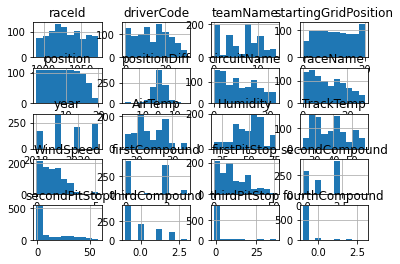

In [78]:
df.hist()
pyplot.show()

In [101]:
array = df.values
X = array[:,0:13]
y = array[:,13:]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
y

array([[ 0.,  0.,  0., ...,  0., -1., -1.],
       [ 0.,  1.,  0., ..., -1., -1., -1.],
       [ 0.,  2.,  0., ..., -1., -1., -1.],
       ...,
       [ 2.,  2.,  2., ...,  0., -1., -1.],
       [ 0.,  7.,  2., ...,  2.,  8.,  0.],
       [ 2.,  2.,  2., ..., -1., -1., -1.]])

In [123]:
model = KNeighborsRegressor()
model.fit(X, y)
predictions = model.predict(X_validation)
labeledPredictions = [firstCompoundLabel[predictions[:,0].astype(int)], firstPitStopLabel[predictions[:,1].astype(int)], secondCompoundLabel[predictions[:,2].astype(int)], secondPitStopLabel[predictions[:,3].astype(int)], thirdCompoundLabel[predictions[:,4].astype(int)], thirdPitStopLabel[predictions[:,5].astype(int)], fourthCompoundLabel[predictions[:,6].astype(int)]]
predictions_df = pd.DataFrame(labeledPredictions).transpose()
predictions_df

,0,1,2,3,4,5,6
0,MEDIUM,28,SOFT,32,SOFT,23,UNKNOWN
1,nan,2,MEDIUM,3,SOFT,22,MEDIUM
2,MEDIUM,10,SOFT,15,UNKNOWN,23,UNKNOWN
3,nan,25,SOFT,34,SOFT,23,UNKNOWN
4,nan,11,MEDIUM,47,HARD,45,SOFT
...,...,...,...,...,...,...,...
182,nan,22,SOFT,15,UNKNOWN,23,UNKNOWN
183,nan,24,SOFT,22,SOFT,39,SOFT
184,SOFT,17,MEDIUM,17,SOFT,45,SOFT
185,nan,25,MEDIUM,32,SOFT,23,UNKNOWN


In [103]:


models = [KNeighborsRegressor(), LinearRegression(), DecisionTreeRegressor(), MultiOutputRegressor(LinearSVR())]
for model in models:
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    n_scores = absolute(n_scores)
    print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 3.071 (0.222)
MAE: 4.092 (0.225)
MAE: 3.584 (0.291)
MAE: 5.546 (1.347)
